In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ast

from scipy.interpolate import make_interp_spline

%matplotlib inline

In [2]:
speeches = pd.read_csv("../data/cleaned_speeches.csv", sep='\t', index_col=0)

In [3]:
speeches.tail()

,year,speaker,speech,n_words
407,1394,موحدی,"['خطيب', 'موقت', 'نماز', 'جمعه', 'تهران', 'بيا...",1264
408,1394,صدیقی,"['خطيب', 'نماز', 'جمعه', 'تهران', 'تصريح', 'کر...",1338
409,1394,موحدی,"['آيت', 'الله', 'موحدي', 'کرماني', 'تأکيد', 'ا...",1047
410,1394,صدیقی,"['خطيب', 'نماز', 'جمعه', 'هفته', 'تهران', 'ذات...",1616
411,1394,جنتی,"['آيت', 'الله', 'احمد', 'جنتي', 'برجام', 'تلقي...",1249


In [4]:
def count_instances(df, word):
    counter = 0
    n_words_mean = df['n_words'].mean()
    for i in range(len(df)):
        row = df.iloc[i]
        for w in ast.literal_eval(row['speech']):
            if word in w:
                counter = counter + 1
    return counter/n_words_mean*1000

In [5]:
YEARS = list(range(1387, 1391)) + list(range(1392, 1399)) + [1400]
YEARS

[1387, 1388, 1389, 1390, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1400]

In [6]:
def annual_freq(word):
    freqs = []
    for year in YEARS:
        word_count = count_instances(speeches[speeches['year']==year], word)
        freqs.append(word_count / len(speeches[speeches['year']==year]))
    
    return freqs

In [7]:
annual_freq('خامنه')

[0.07844983133286264,
 0.042448650398221405,
 0.02613240418118467,
 0.01391304347826087,
 0.052254794377384124,
 0.05082333807684489,
 0.0,
 0.0818464560484531,
 0.14575842969585073,
 0.0,
 0.33016091756025434,
 0.039447731755424056]

In [8]:
def categorical_freqs(category_w):
    all_freqs = [0] * len(YEARS)
    for w in category_w:
        single_w_freqs = annual_freq(w)
        for i, f in enumerate(single_w_freqs):
            all_freqs[i] = all_freqs[i] + f
    
    for i, _ in enumerate(all_freqs):
            all_freqs[i] = all_freqs[i] / len(category_w)
            
    return all_freqs

In [9]:
def plot_freqs(title, freqs):
    X_Y_Spline = make_interp_spline(YEARS, freqs)
    X_ = np.linspace(YEARS[0], YEARS[-1], 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_)
    plt.axvline(x=1392, linestyle='dotted', label='Election')
    plt.axvline(x=1396, linestyle='dotted')
    plt.axvline(x=1400, linestyle='dotted')
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Frequency")

In [84]:
economic_w = ['گرانی', 'تورم', 'اقتصاد', 'تحریم' , 'فقر', 'قیمت', 'بورس', 'مالیات', 'فاصله']
economic_freqs = categorical_freqs(economic_w)

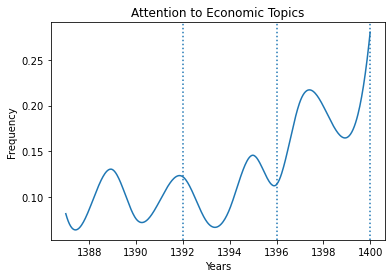

In [85]:
plot_freqs('Attention to Economic Topics', economic_freqs)

In [12]:
unpragmatic_w = ['مقاومتی', 'بانک', 'کفایی', 'مشت', 'دهان', 'شکستن', 'هسته']
unpragmatic_freqs = categorical_freqs(unpragmatic_w)

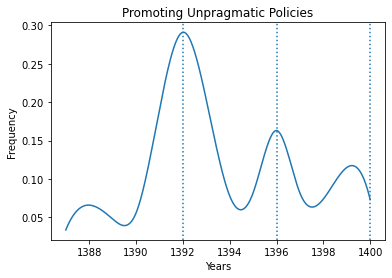

In [13]:
plot_freqs('Promoting Unpragmatic Policies', unpragmatic_freqs)

In [81]:
socialist_w = ['بیمه', 'جهادی', 'طبقات', 'بسیج', 'یارانه', 'کوپن', 'گندم', 'ارزش']
socialist_freqs = categorical_freqs(socialist_w)

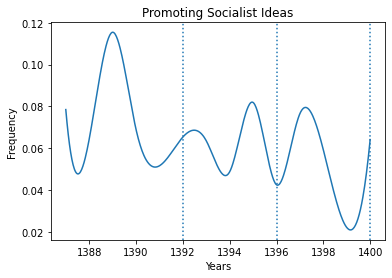

In [82]:
plot_freqs('Promoting Socialist Ideas', socialist_freqs)

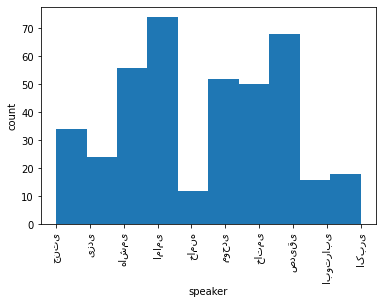

In [16]:
plt.hist(speeches[speeches['speaker'] != 'others']['speaker'])
plt.xlabel("speaker")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [17]:
speeches.groupby('speaker').count()

,year,speech,n_words
speaker,,,
others,8,8,8
ابوترابی,16,16,16
امامی,74,74,74
اکبری,18,18,18
جنتی,34,34,34
خاتمی,50,50,50
خامنه,12,12,12
صدیقی,68,68,68
موحدی,52,52,52


In [35]:
khamenei_w = ['مادر']
khamenei_freqs = categorical_freqs(khamenei_w)

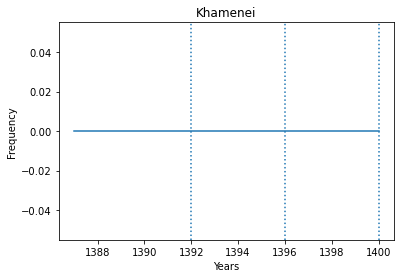

In [36]:
plot_freqs('Khamenei', khamenei_freqs)

In [97]:
unpragmatic_w1 = ['مقاومتی', 'بانک', 'کفایی', 'مشت', 'دهان', 'شکستن', 'هسته']
unpragmatic_freqs1 = categorical_freqs(unpragmatic_w1)

unpragmatic_w2 = ['مقاومتی', 'بانک', 'کفایی', 'مشت', 'دهان', 'شکستن', 'هسته', 'فلسطین']
unpragmatic_freqs2 = categorical_freqs(unpragmatic_w2)

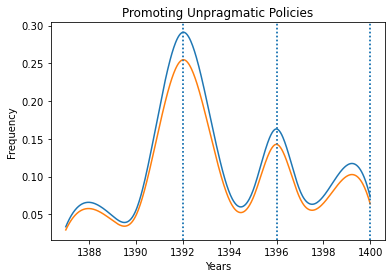

In [96]:
plot_freqs('Promoting Unpragmatic Policies', unpragmatic_freqs1)
plot_freqs('Promoting Unpragmatic Policies', unpragmatic_freqs2)

In [ ]:
plot_freqs('Attention to Economic Topics', economic_freqs2)